In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from arrivial_rate import arrivial_rate


fname = "/home/kc/Research/air_traffic/data/fr24_clean/time_distance.txt"
sdir = "/home/kc/Research/air_traffic/figures/2022-03-01"

plt.rcParams.update({
    "font.family": "serif",
    "font.sans-serif": ["Helvetica"]}
)

In [231]:
year = 2017
dt = 60 * 15
day_sec = 86400
day_n = 86400 // dt  # Number of time steps in one day
hour_n = 3600 // dt  # Number of time stemps in one hour

In [232]:
df = pd.read_csv(fname, header=0)
df["year"] = pd.to_datetime(df["t_f"], unit="s").dt.year
df["month"] = pd.to_datetime(df["t_f"], unit="s").dt.month
df = df.loc[df["year"] == year]
df = df[df["month"].isin(range(1, 3))]

arr_times = df["t_f"].to_numpy()
arr_rate, t_axis = arrivial_rate(arr_times, dt, start_hour=16, start_by="cut")

total_day = len(t_axis) // day_n  # Number of day contained in time series

In [233]:
# Joint distribution at abnormal time

t1 = 3600 * 3  # 2:00 HKT
n1 = t1 // dt

t2 = 3600 * 12 # 12:00 HKT
n2 = t2 // dt


lambda1 = []
lambda2 = []

for i in range(total_day):
    for j in range(-hour_n, hour_n+1):
        lambda1.append(arr_rate[n1 + j + i*day_n])
        lambda2.append(arr_rate[n2 + j + i*day_n])

hist, x_edges, y_edges = np.histogram2d(lambda1, lambda2, bins=range(10), density=False)


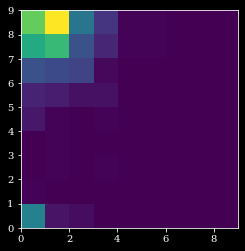

In [234]:
# Draw Joint distribution

fig, ax = plt.subplots()

hist = hist.T   # histogram2d and imshow has different index convention
im = ax.imshow(hist, cmap="viridis", origin="lower",
               extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.show()

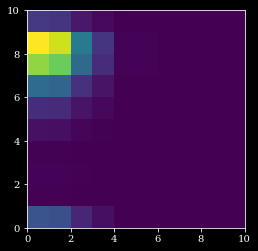

In [235]:
# Draw Product distribution

fig, ax = plt.subplots()

x_hist, x_edges, = np.histogram(lambda1, bins=range(11), density=False)
y_hist, y_edges, = np.histogram(lambda2, bins=range(11), density=False)

hist_p = np.outer(y_hist, x_hist)


im = ax.imshow(hist_p, cmap="viridis", origin="lower",
               extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.show()

In [236]:
# Joint distribution at normal time

t3 = 3600 * 10  # 12:00 HKT
n3 = t3 // dt

t4 = 3600 * 16 # 13:00 HKT
n4 = t4 // dt


lambda3 = []
lambda4 = []

for i in range(total_day):
    for j in range(-hour_n, hour_n+1):
        lambda3.append(arr_rate[n3 + j + i*day_n])
        lambda4.append(arr_rate[n4 + j + i*day_n])

hist, x_edges, y_edges = np.histogram2d(lambda3, lambda4, bins=range(11), density=False)


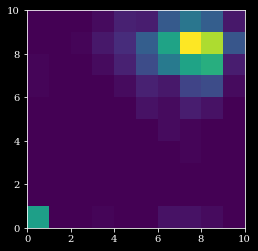

In [237]:
# Draw Joint distribution

fig, ax = plt.subplots()

hist = hist.T   # histogram2d and imshow has different index convention
im = ax.imshow(hist, cmap="viridis", origin="lower",
               extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.show()

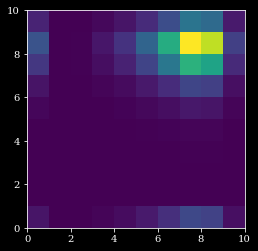

In [238]:
# Draw Product distribution

fig, ax = plt.subplots()

x_hist, x_edges, = np.histogram(lambda3, bins=range(11), density=False)
y_hist, y_edges, = np.histogram(lambda4, bins=range(11), density=False)
hist_p = np.outer(y_hist, x_hist)

im = ax.imshow(hist_p, cmap="viridis", origin="lower",
               extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.show()